# Análise de perfil de interesse para campanha de marketing

# Objetivos:

## Geral:
- Identificar qual o perfil dos clientes com maior propensão à aceitação de campanhas de marketing a fim de aumentar o ROI de ações futuras.

## Específicos:

- Avaliar quais ações de campanha tiveram maior aceite dos clientes;
- Definir perfil socioeconômico dos clientes que engajaram com a campanha;
- Cruzamento de dados de engajamento e gasto para avaliar se clientes engajados tendem a consumir mais;





# Preparação dos dados para análise:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_ifood = pd.read_csv('/content/drive/MyDrive/Estudos de Análise de dados/Case ifood/ifood_df.csv')
df_ifood.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [4]:
# verificando o tamanho da base de dados
df_ifood.shape

(2205, 39)

In [5]:
df_ifood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [6]:
# Estatísticas básicas
df_ifood.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [7]:
# criando coluna de id para os clientes
df_ifood["User_ID"] = df_ifood.index + 1
df_ifood.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,User_ID
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,1,0,0,1529,1441,0,1
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,1,0,0,21,15,0,2
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,0,734,692,0,3
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,48,43,0,4
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,1,407,392,0,5


In [8]:
# Verificando valores duplicados
df_ifood.duplicated().sum()

np.int64(0)

In [9]:
# Criar coluna para faixa etária

bins = [0, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ["0-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90"]

df_ifood_alter = df_ifood
df_ifood_alter["Age_Interval"] = pd.cut(df_ifood_alter['Age'], bins=bins, labels=labels, right=True)
df_ifood_alter.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,User_ID,Age_Interval
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,1,60-70
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,2,60-70
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,3,50-60
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,4,30-40
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,5,30-40


In [10]:
# Criar coluna de estado civil
def estado_civil(linha):
  if linha["marital_Married"] ==1:
    return "Casado"
  elif linha["marital_Divorced"] ==1:
    return "Divorciado"
  elif linha["marital_Single"] ==1:
    return "Solteiro"
  elif linha["marital_Together"] ==1:
    return "União estável"
  elif linha["marital_Widow"] ==1:
    return "Viúvo"

df_ifood_alter["marital_Status"]= df_ifood_alter.apply(estado_civil, axis=1)
df_ifood_alter.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,User_ID,Age_Interval,marital_Status
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,1,0,0,1529,1441,0,1,60-70,Solteiro
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,1,0,0,21,15,0,2,60-70,Solteiro
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,1,0,0,734,692,0,3,50-60,União estável
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,1,0,0,48,43,0,4,30-40,União estável
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,1,407,392,0,5,30-40,Casado


In [11]:
# Criar coluna de nível de escolaridade
def escolaridade(linha):
  if linha["education_2n Cycle"] ==1:
    return "Ensino médio"
  elif linha["education_Basic"] ==1:
    return "Ensino fundamental"
  elif linha["education_Graduation"] ==1:
    return "Graduação"
  elif linha["education_Master"] ==1:
    return "Mestrado"
  elif linha["education_PhD"] ==1:
    return "Doutorado"

df_ifood_alter["educational_level"]= df_ifood_alter.apply(escolaridade, axis=1)
df_ifood_alter.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,User_ID,Age_Interval,marital_Status,educational_level
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,0,0,1529,1441,0,1,60-70,Solteiro,Graduação
1,46344.0,1,1,38,11,1,6,2,1,6,...,1,0,0,21,15,0,2,60-70,Solteiro,Graduação
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,734,692,0,3,50-60,União estável,Graduação
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,48,43,0,4,30-40,União estável,Graduação
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,1,407,392,0,5,30-40,Casado,Doutorado


In [12]:
bins = [20000, 30000, 60000, 80000, 100000, 200000]
labels = ["Classe E", "Classe D", "Classe C", "Classe B", "Classe A"]

df_ifood_alter["Income_Status"] = pd.cut(df_ifood_alter['Income'], bins=bins, labels=labels, right=True)
df_ifood_alter.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,User_ID,Age_Interval,marital_Status,educational_level,Income_Status
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1529,1441,0,1,60-70,Solteiro,Graduação,Classe D
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,21,15,0,2,60-70,Solteiro,Graduação,Classe D
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,734,692,0,3,50-60,União estável,Graduação,Classe C
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,48,43,0,4,30-40,União estável,Graduação,Classe E
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,1,407,392,0,5,30-40,Casado,Doutorado,Classe D


In [13]:
# Remoção de colunas redundantes

colunas_drop = ['marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD']
df_ifood_alter = df_ifood_alter.drop(colunas_drop, axis = 1)
df_ifood_alter.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'User_ID', 'Age_Interval', 'marital_Status',
       'educational_level', 'Income_Status'],
      dtype='object')

In [14]:
# Conversão da coluna Customer_Days de dias para anos

df_ifood_alter["Customer_Years"] = round(df_ifood_alter["Customer_Days"]/365, 0)
df_ifood_alter.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,User_ID,Age_Interval,marital_Status,educational_level,Income_Status,Customer_Years
0,58138.0,0,0,58,635,88,546,172,88,88,...,2822,1529,1441,0,1,60-70,Solteiro,Graduação,Classe D,8.0
1,46344.0,1,1,38,11,1,6,2,1,6,...,2272,21,15,0,2,60-70,Solteiro,Graduação,Classe D,6.0
2,71613.0,0,0,26,426,49,127,111,21,42,...,2471,734,692,0,3,50-60,União estável,Graduação,Classe C,7.0
3,26646.0,1,0,26,11,4,20,10,3,5,...,2298,48,43,0,4,30-40,União estável,Graduação,Classe E,6.0
4,58293.0,1,0,94,173,43,118,46,27,15,...,2320,407,392,0,5,30-40,Casado,Doutorado,Classe D,6.0


Dados estatísticos:

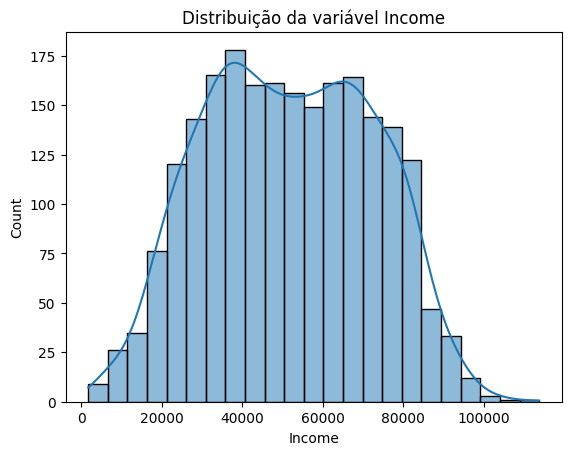

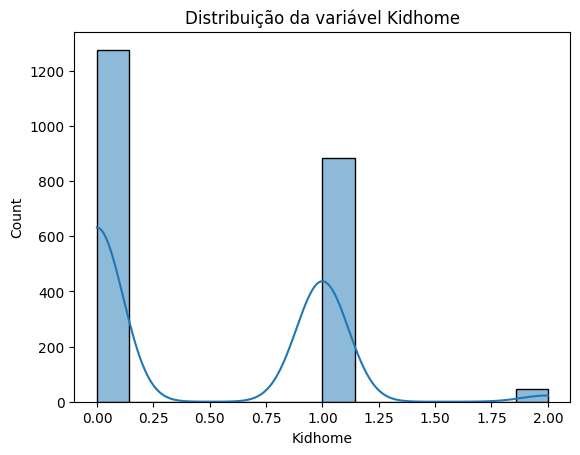

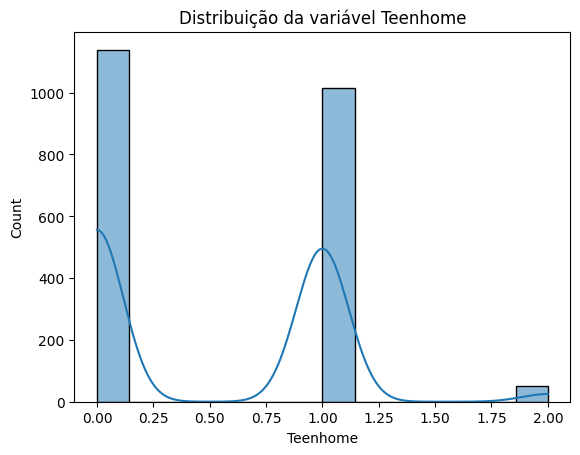

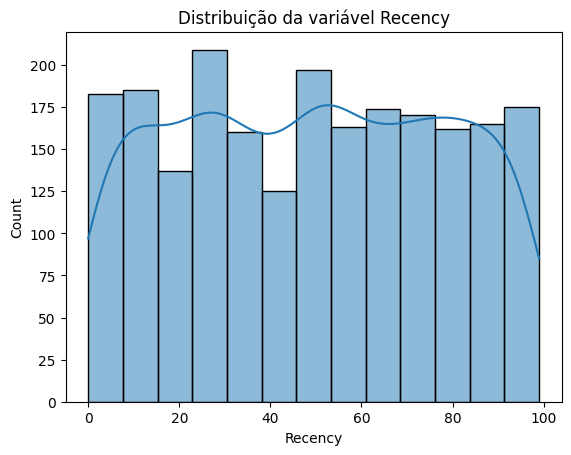

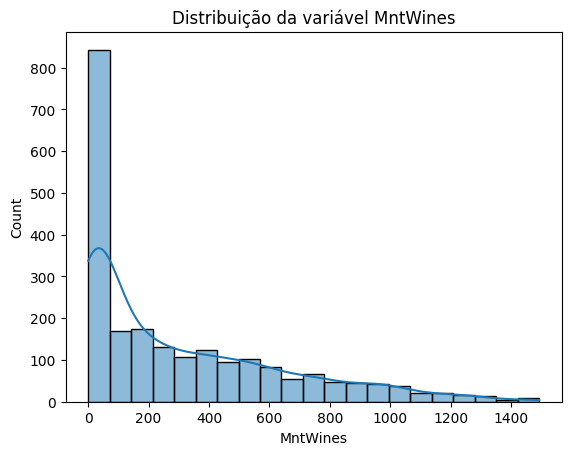

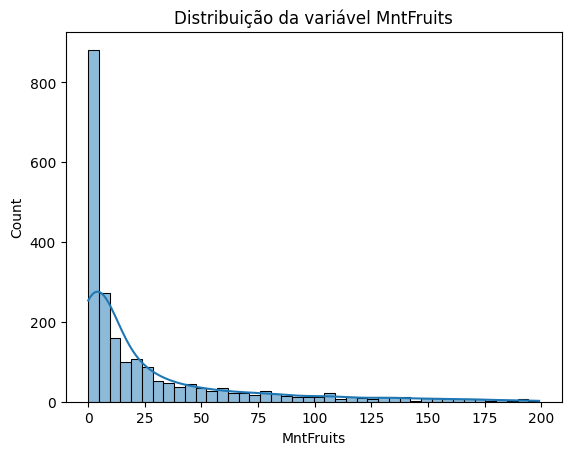

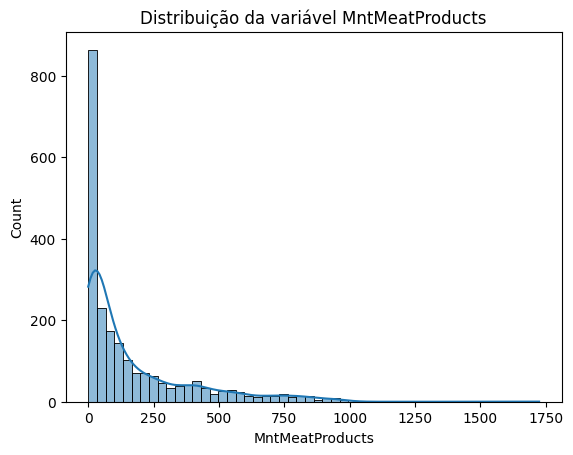

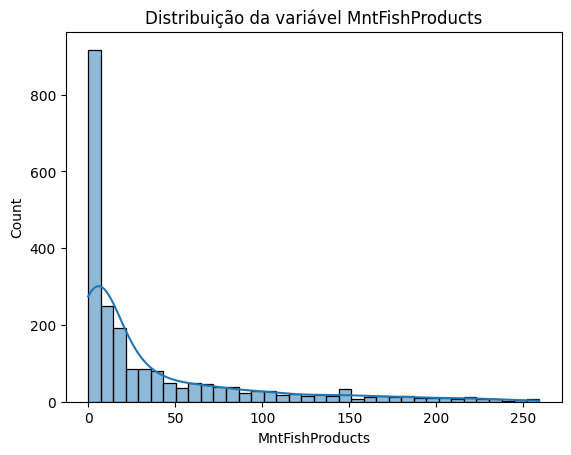

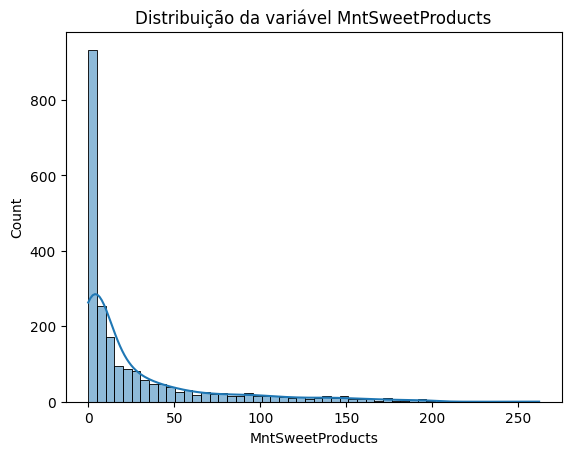

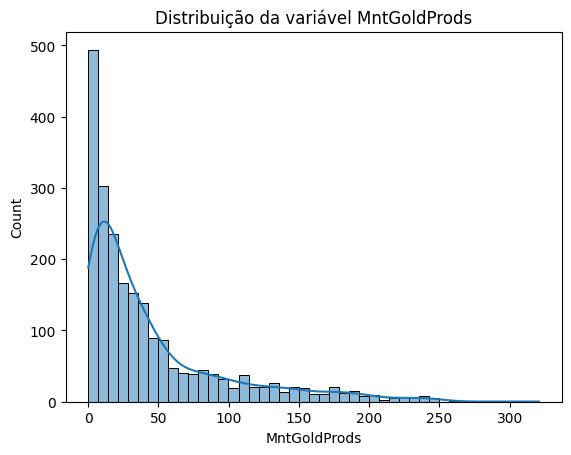

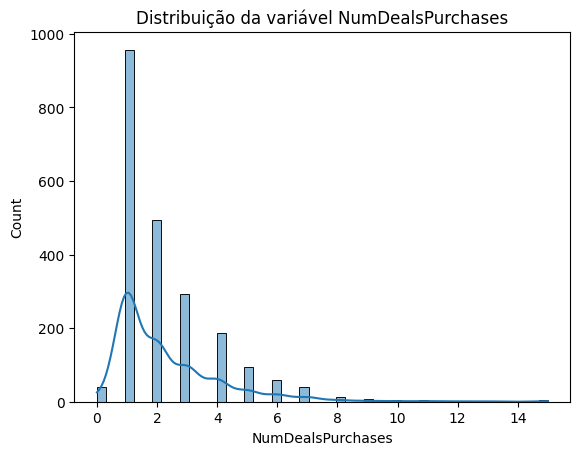

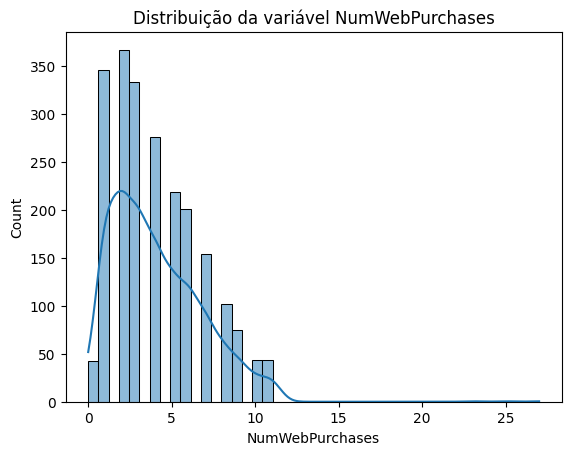

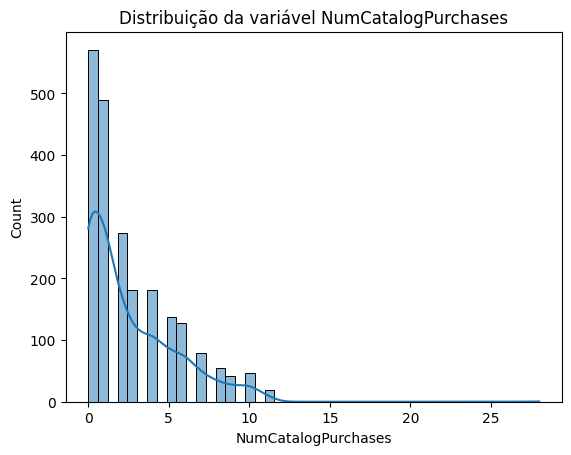

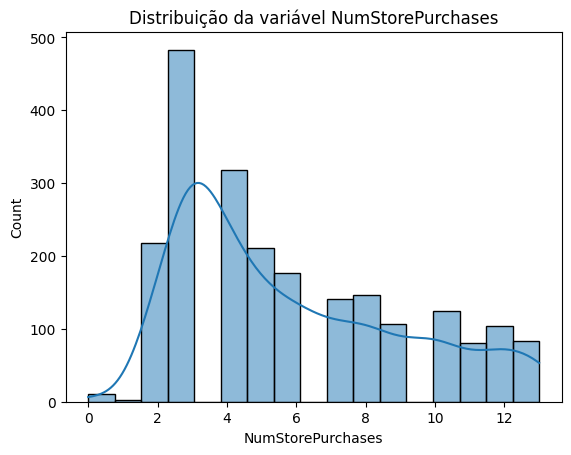

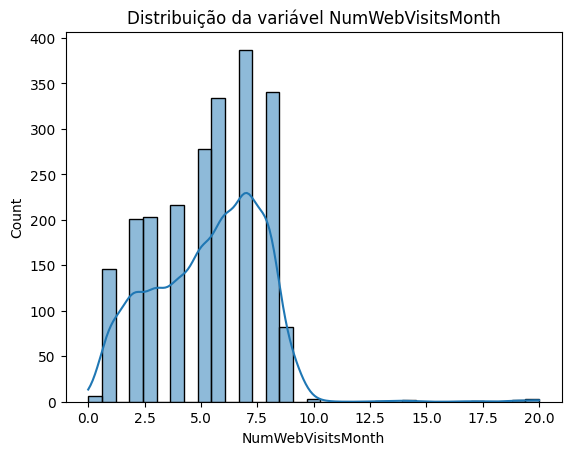

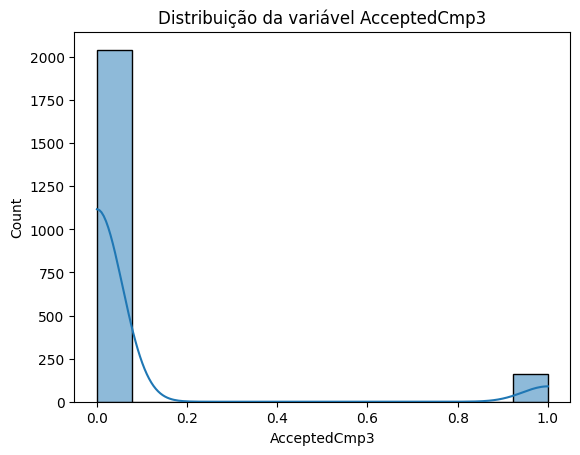

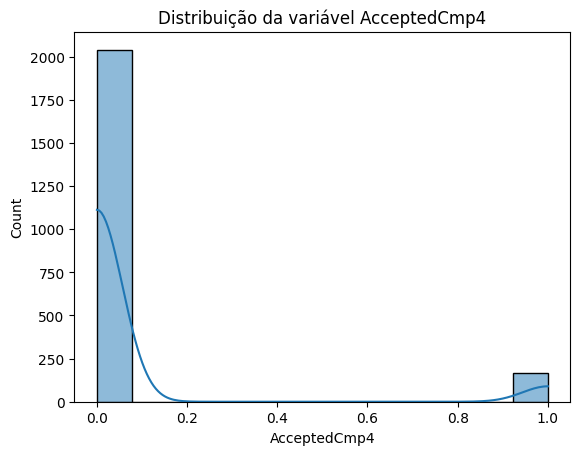

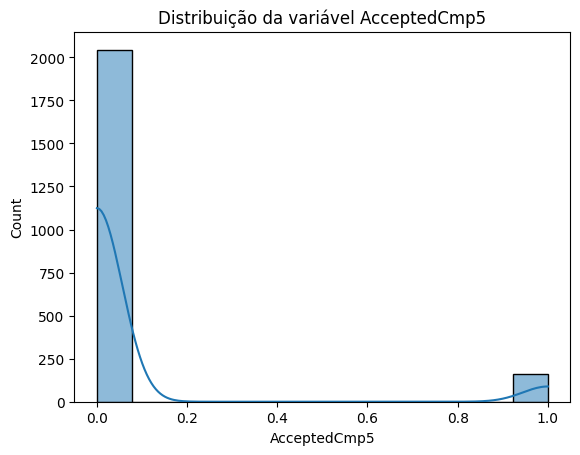

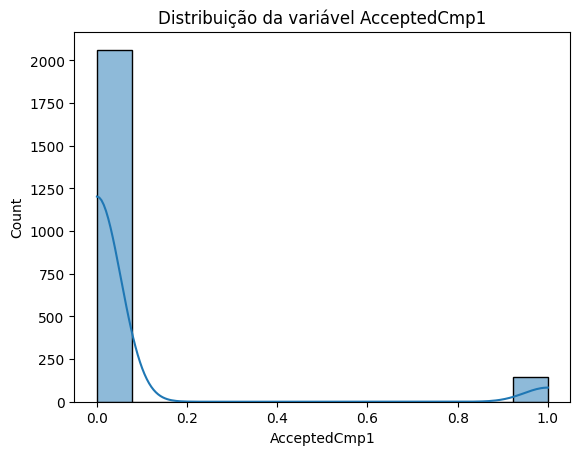

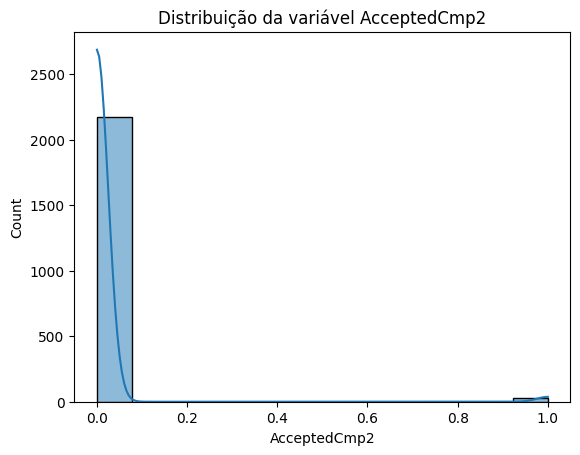

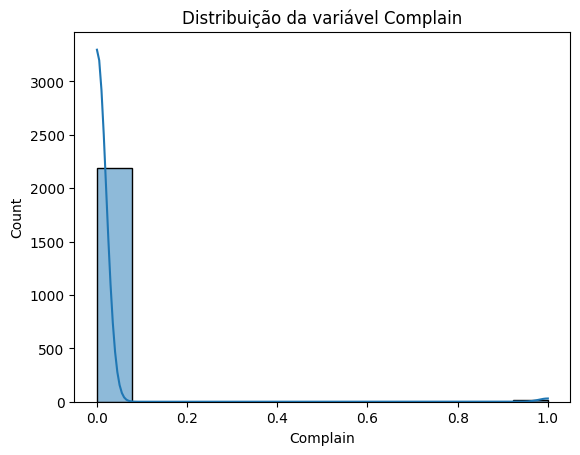

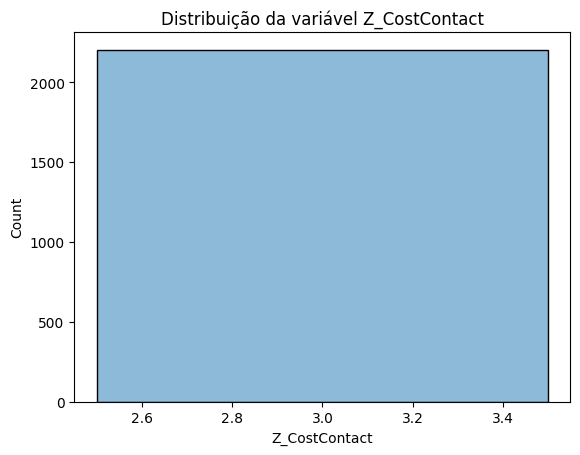

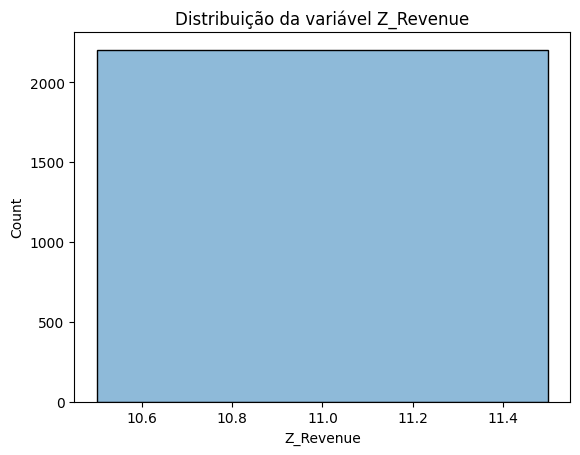

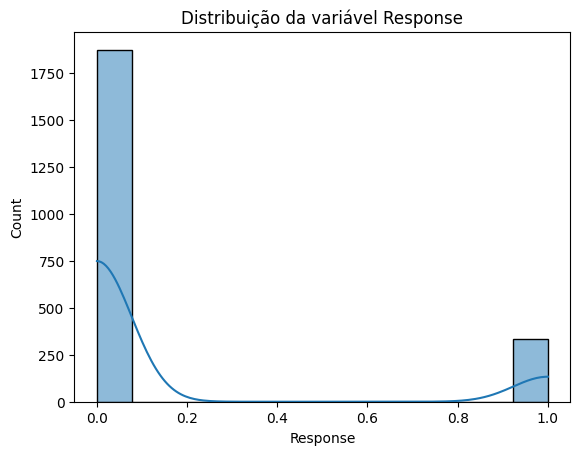

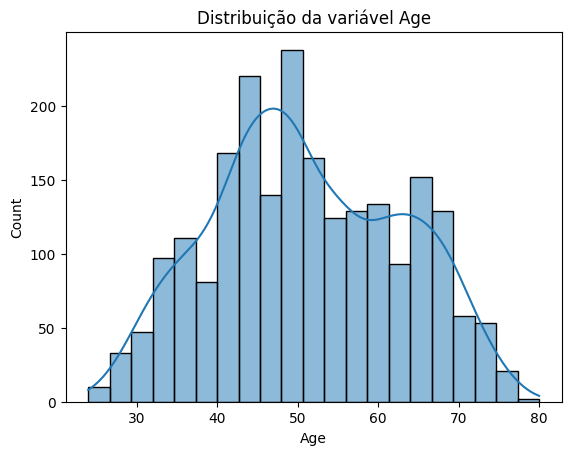

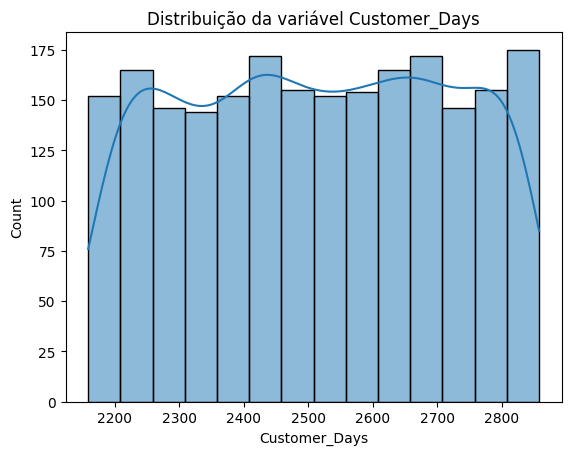

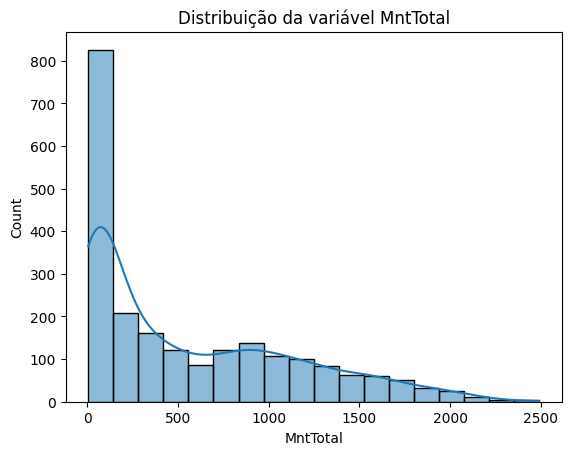

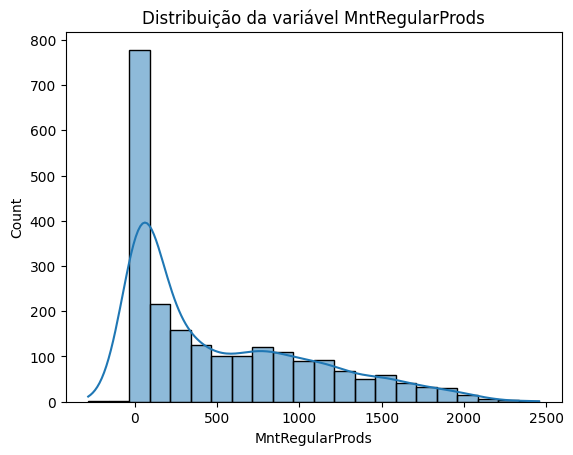

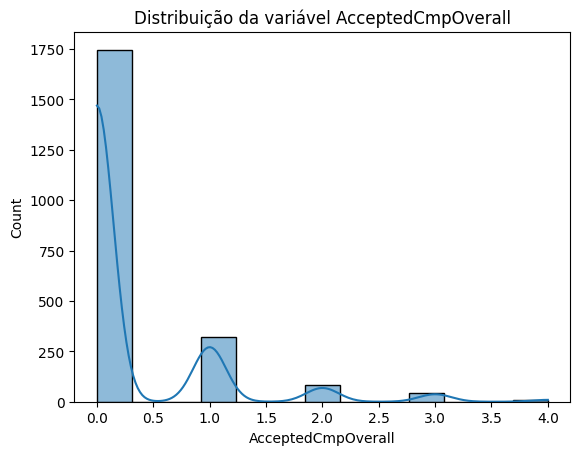

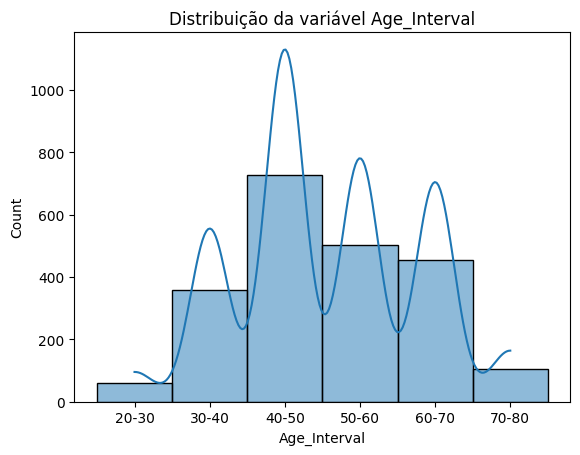

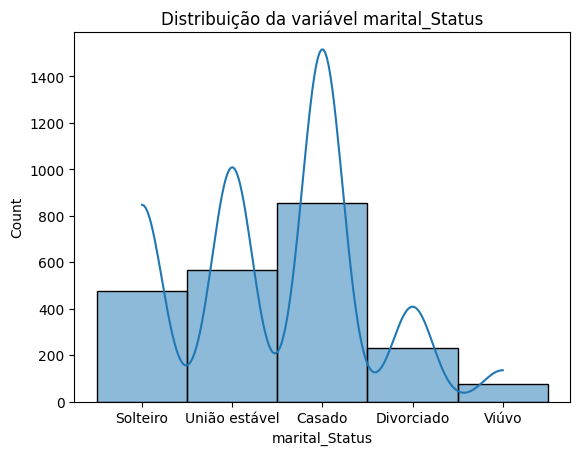

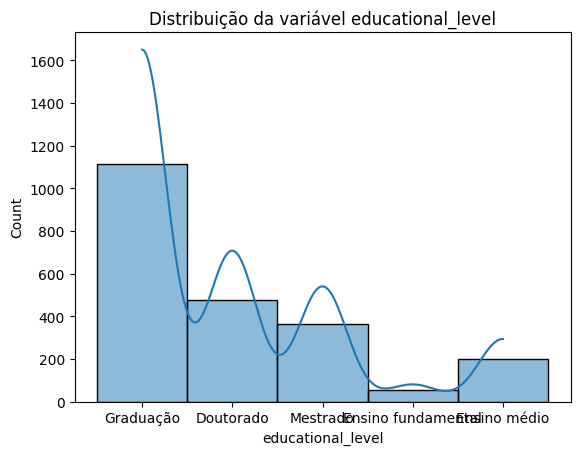

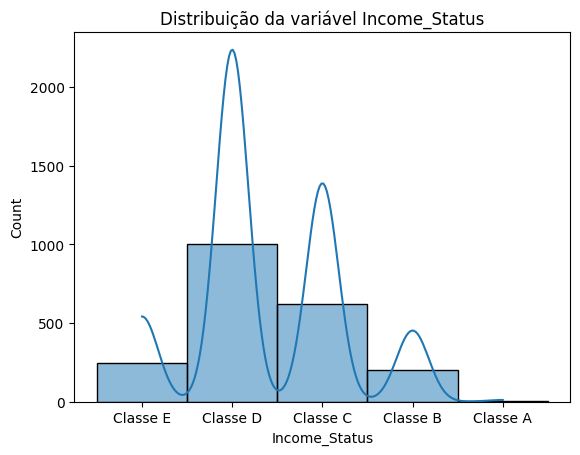

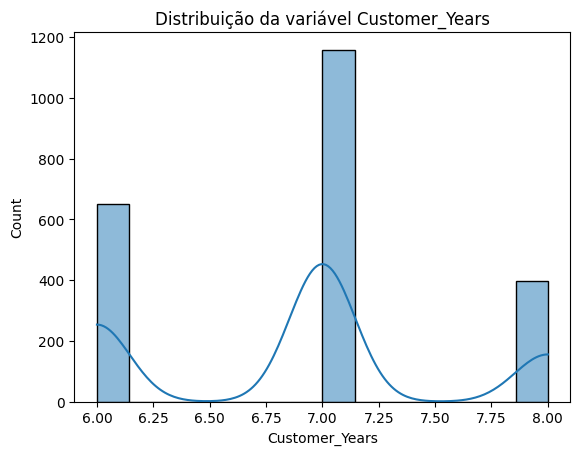

In [15]:
for coluna in df_ifood_alter.columns[df_ifood_alter.columns != "User_ID"]:
    sns.histplot(data=df_ifood_alter, x=coluna, kde=True).set_title(f"Distribuição da variável {coluna}")
    plt.show()

In [16]:
df_ifood_alter.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,User_ID,Customer_Years
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,3.0,11.0,0.15102,51.095692,2512.718367,562.764626,518.707483,0.29932,1103.000000,6.886168
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.0,0.0,0.35815,11.705801,202.563647,575.936911,553.847248,0.68044,636.672993,0.679766
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.0,11.0,0.00000,24.000000,2159.000000,4.000000,-283.000000,0.00000,1.000000,6.000000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,3.0,11.0,0.00000,43.000000,2339.000000,56.000000,42.000000,0.00000,552.000000,6.000000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,3.0,11.0,0.00000,50.000000,2515.000000,343.000000,288.000000,0.00000,1103.000000,7.000000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,3.0,11.0,0.00000,61.000000,2688.000000,964.000000,884.000000,0.00000,1654.000000,7.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,3.0,11.0,1.00000,80.000000,2858.000000,2491.000000,2458.000000,4.00000,2205.000000,8.000000


In [17]:
compras = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']
for coluna in compras:
  total = df_ifood_alter[coluna].sum()
  print(f'{coluna}: Total: {total}')

NumDealsPurchases: Total: 5112
NumWebPurchases: Total: 9042
NumCatalogPurchases: Total: 5833
NumStorePurchases: Total: 12841


# Análises e Insights:

## Qual a % de clientes que aceitaram a última campanha?

In [18]:
def frequencia(dataset, column):
  '''
  HELP: Tabela de frequência: absoluta e relativa
  Análise de frequência:
    - Qualitativa: Nominal ou Ordinal
    - Quantitativa: Discreta
  '''
  table_counts = dataset[column].value_counts()
  table_total = table_counts.sum()
  table = pd.DataFrame({
      column: table_counts.index,
      'FREQUÊNCIA ABSOLUTA': table_counts.values,
      'FREQUÊNCIA RELATIVA (%)': table_counts.values / table_total * 100
  }, index = range(0, len(table_counts)))

  return table

In [19]:
freq_resposta = frequencia(df_ifood_alter, "Response")
freq_resposta

,Response,FREQUÊNCIA ABSOLUTA,FREQUÊNCIA RELATIVA (%)
0,0,1872,84.897959
1,1,333,15.102041


A análise de frequência indica que 85% dos clientes que receberam a última ação da campanha não a aceitaram. Ou seja, os esforços da campanha falharam em cativar o interesse dos consumidores.

## Como foi o desempenho de cada ação de campanha?

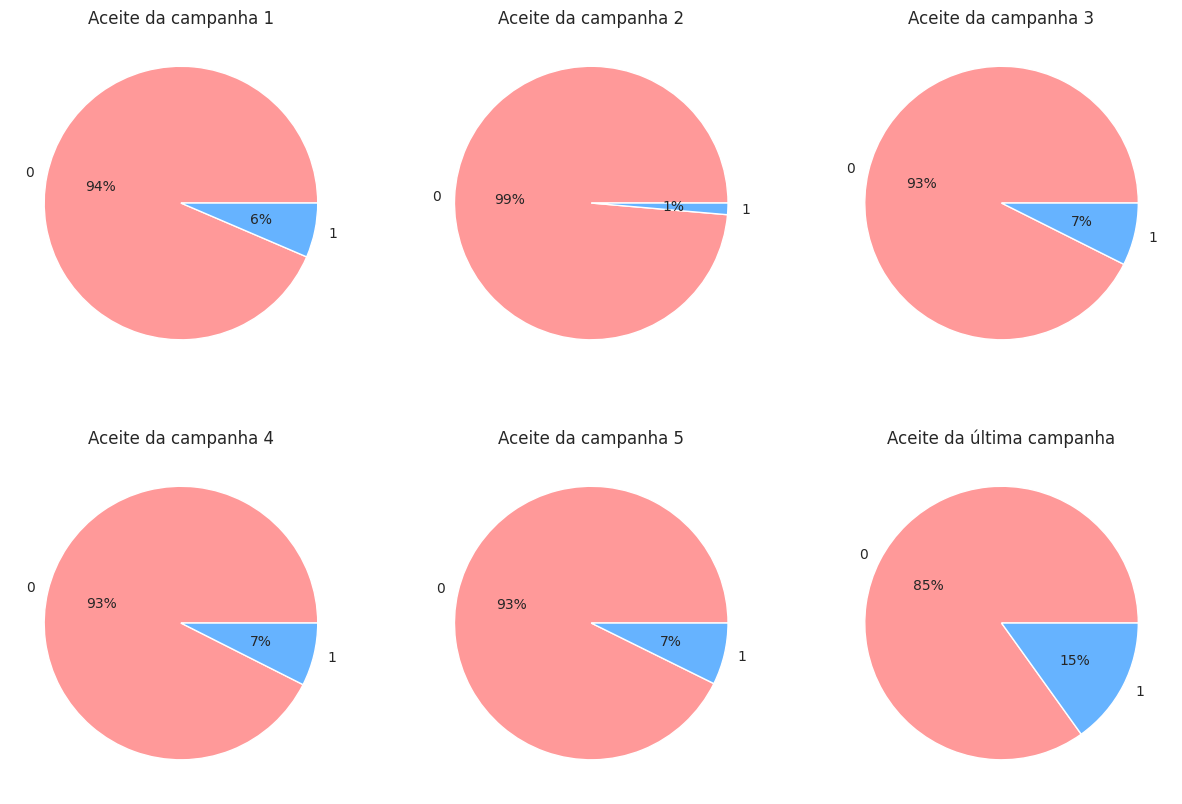

In [20]:
cols_campanhas = ['AcceptedCmp1','AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', "Response"]

sns.set_style("whitegrid")
colors = ['#ff9999','#66b3ff']

plt.figure(figsize = (15, 10))

for i, col in enumerate(cols_campanhas):
  plt.subplot(2,3, i+1)
  plt.title(col)
  data = df_ifood_alter[col].value_counts()
  plt.pie(data, labels=data.index, colors = colors, autopct='%.0f%%')
  if i<5:
    plt.title(f"Aceite da campanha {i+1}")
  else:
    plt.title(f"Aceite da última campanha")
plt.show()

A última ação da campanha foi a que obteve maior porcentagem de aceitação dos clientes, enquanto as demais ações obtiveram menos de 10% de aceite com destaque para a campanha 2 com apenas 1%.

## Qual a % de clientes que fizeram reclamações nos últimos 2 anos?

In [21]:
freq_reclamacao = frequencia(df_ifood_alter, "Complain")
freq_reclamacao

,Complain,FREQUÊNCIA ABSOLUTA,FREQUÊNCIA RELATIVA (%)
0,0,2185,99.092971
1,1,20,0.907029


Menos de 1% dos clientes registraram alguma reclamção no site nos últimos 2 anos, indicando que as campanhas atingiram clientes satisfeitos com o serviço. Logo, esse insatisfação não é um fator que tenha afetado o desempenho das campanhas de marketing.

## Com base no sucesso da última campanha qual foi o perfil dos clientes, ou seja, idade, estado civil, educação, etc. que demonstraram aceitação?

In [22]:
df_resposta_positiva = df_ifood_alter[df_ifood_alter["Response"]==1]
df_resposta_positiva.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,User_ID,Age_Interval,marital_Status,educational_level,Income_Status,Customer_Years
0,58138.0,0,0,58,635,88,546,172,88,88,...,2822,1529,1441,0,1,60-70,Solteiro,Graduação,Classe D,8.0
8,30351.0,1,0,19,14,0,24,3,3,2,...,2547,44,42,0,9,40-50,União estável,Doutorado,Classe D,7.0
14,82800.0,0,0,23,1006,22,115,59,68,45,...,2741,1270,1225,2,15,70-80,Solteiro,Doutorado,Classe B,8.0
31,46610.0,0,2,8,96,12,96,33,22,43,...,2767,259,216,0,32,60-70,Divorciado,Doutorado,Classe D,8.0
37,48948.0,0,0,53,437,8,206,160,49,42,...,2672,860,818,1,38,70-80,Divorciado,Doutorado,Classe D,7.0


Qual faixa etária teve maior aceitação da campanha?

In [23]:
perfil_idade = df_resposta_positiva.groupby("Age_Interval")["Response"].count().reset_index()
perfil_idade

/tmp/ipython-input-2664803772.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  perfil_idade = df_resposta_positiva.groupby("Age_Interval")["Response"].count().reset_index()


,Age_Interval,Response
0,0-20,0
1,20-30,14
2,30-40,67
3,40-50,105
4,50-60,63
5,60-70,59
6,70-80,25
7,80-90,0


In [24]:
# função para gráficos de barras

def plot_graficobarra(df, colunax, colunay):
  sns.set_style("white")
  plt.figure(figsize=(10, 6))

  ax = sns.barplot(data=df, x=colunax, y=colunay)
  ax.set(ylabel=None)
  ax.set(xlabel=None)
  ax.set(yticklabels=[])
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)

  bars = ax.containers[0]
  heights = [bar.get_height() for bar in bars]

  # legenda
  for bar, height in zip(bars, heights):
      ax.text(
          bar.get_x() + bar.get_width()/2.,
          height,
          f'{height:.0f}',
          ha='center',
          va='bottom', fontweight="bold"
      )

  indice_maximo = df[colunay].values.argmax()

  for i, barra in enumerate(bars):
    if i != indice_maximo:
      bars[i].set_color("grey")
      bars[i].set_alpha(0.3)
    else:
      barra.set_color("royalblue")
      barra.set_alpha(0.8)

Text(0.5, 1.0, 'Clientes com 40-50 anos tendem a aceitar mais campanhas')

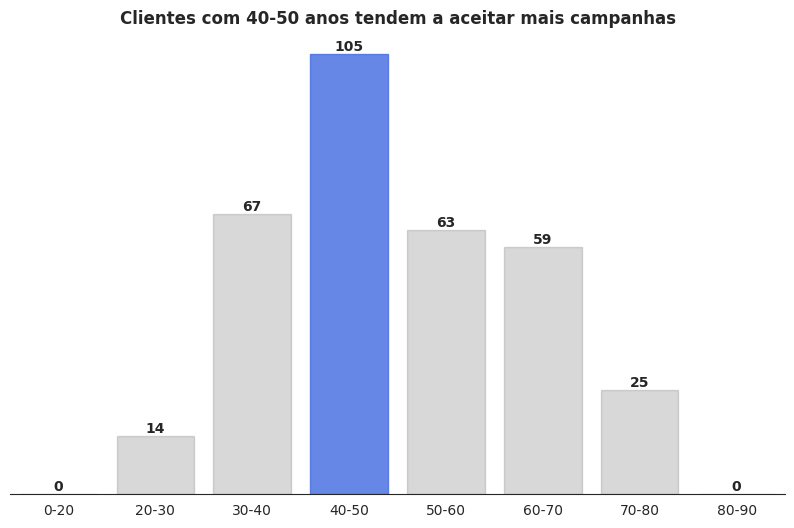

In [25]:
grafico_idade = plot_graficobarra(perfil_idade, "Age_Interval", "Response")
plt.title("Clientes com 40-50 anos tendem a aceitar mais campanhas", fontweight = "bold")

/tmp/ipython-input-279592370.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dependentes_faixa = df_resposta_positiva.groupby("Age_Interval")[coluna].sum().reset_index()
/tmp/ipython-input-279592370.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dependentes_faixa = df_resposta_positiva.groupby("Age_Interval")[coluna].sum().reset_index()


A faixas etárias dependentes: Kidhome
  Age_Interval  Kidhome
0         0-20        0
1        20-30        0
2        30-40       26
3        40-50       59
4        50-60       14
5        60-70       12
6        70-80        3
7        80-90        0
A faixas etárias dependentes: Teenhome
  Age_Interval  Teenhome
0         0-20         0
1        20-30         0
2        30-40         1
3        40-50        29
4        50-60        32
5        60-70        32
6        70-80         8
7        80-90         0


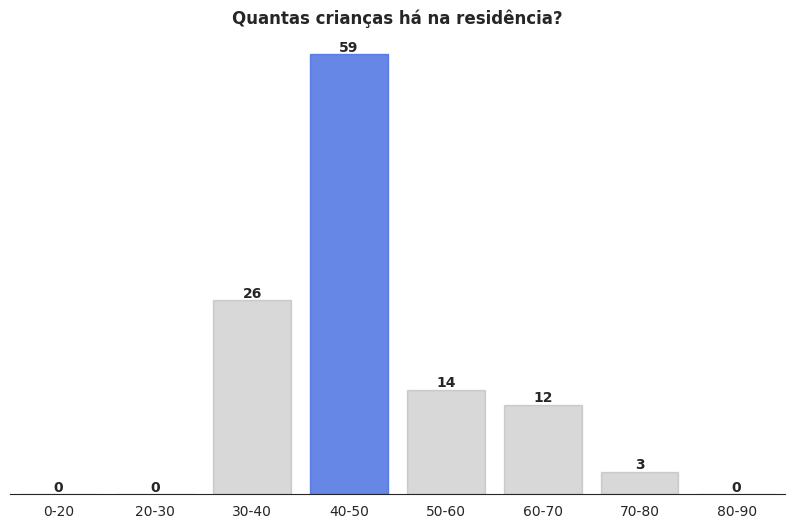

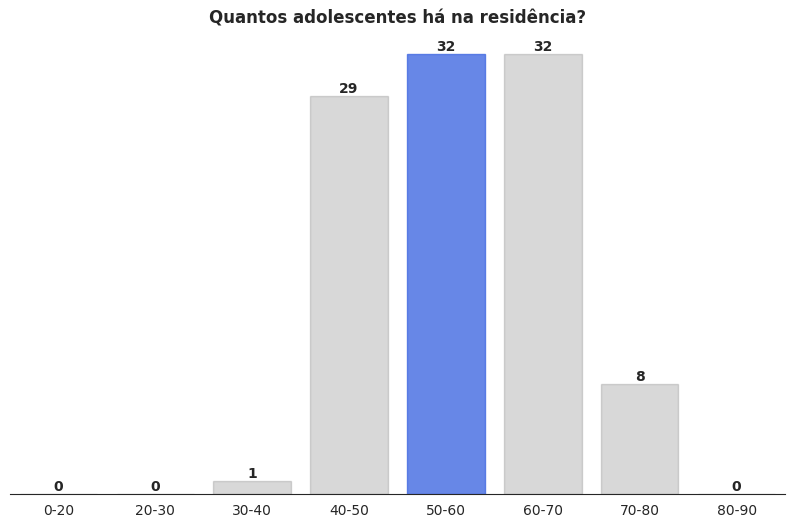

In [26]:
coluna_dependentes = ['Kidhome', 'Teenhome']

for coluna in coluna_dependentes:
  dependentes_faixa = df_resposta_positiva.groupby("Age_Interval")[coluna].sum().reset_index()
  print(f"A faixas etárias dependentes: {coluna}")
  print(dependentes_faixa)
  plot_graficobarra(dependentes_faixa, "Age_Interval", coluna)
  if coluna == "Kidhome":
    plt.title("Quantas crianças há na residência?", fontweight= "bold")
  else:
    plt.title("Quantos adolescentes há na residência?", fontweight= "bold")



A faixa etária de 40-50 anos possui mais dependentes em casa, 59 crianças e 29 adolescentes.

Qual faixa salarial teve maior aceitação da campanha?

In [27]:
perfil_salario = df_resposta_positiva.groupby("Income_Status")["Response"].sum().reset_index()
perfil_salario

/tmp/ipython-input-437828844.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  perfil_salario = df_resposta_positiva.groupby("Income_Status")["Response"].sum().reset_index()


,Income_Status,Response
0,Classe E,26
1,Classe D,113
2,Classe C,94
3,Classe B,83
4,Classe A,4


Text(0.5, 1.0, 'Clientes da classe D tendem a aceitar mais campanhas')

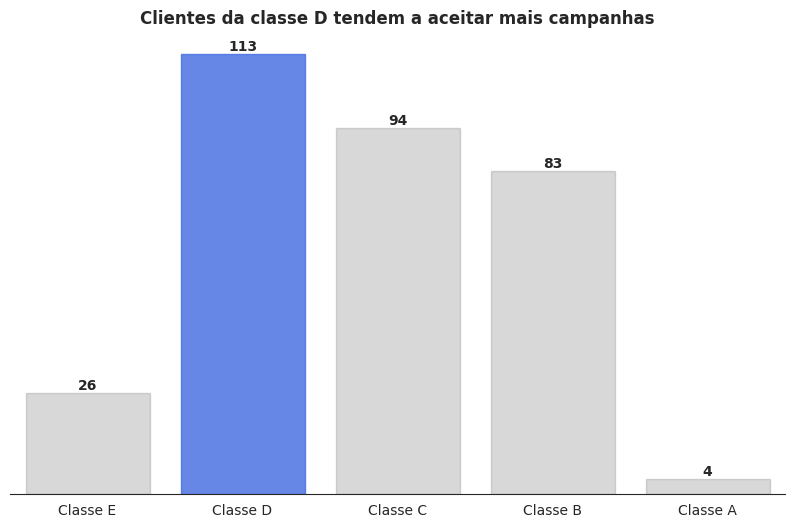

In [28]:
grafico_salario = plot_graficobarra(perfil_salario, "Income_Status", "Response")
plt.title("Clientes da classe D tendem a aceitar mais campanhas", fontweight = "bold")

Qual o perfil de clientes que mais aceitaram a campanha por estado civil?

In [29]:
perfil_estadocivil = df_resposta_positiva.groupby("marital_Status")["Response"].sum().reset_index()
perfil_estadocivil

,marital_Status,Response
0,Casado,98
1,Divorciado,48
2,Solteiro,109
3,União estável,60
4,Viúvo,18


Text(0.5, 1.0, 'Clientes solteiros tendem a aceitar mais campanhas')

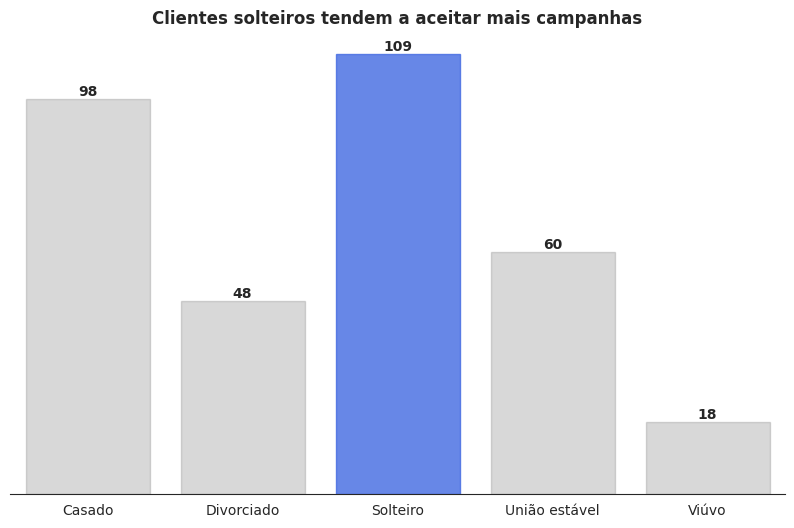

In [30]:
grafico_estadocivil = plot_graficobarra(perfil_estadocivil, "marital_Status", "Response")
plt.title("Clientes solteiros tendem a aceitar mais campanhas", fontweight = "bold")

Qual o perfil dos clientes que mais aceitaram a campanha por nível educacional?

In [31]:
perfil_nivel_educacao = df_resposta_positiva.groupby("educational_level")["Response"].sum().reset_index()
perfil_nivel_educacao

,educational_level,Response
0,Doutorado,101
1,Ensino fundamental,2
2,Ensino médio,22
3,Graduação,152
4,Mestrado,56


Text(0.5, 1.0, 'Clientes com graduação completa tendem a aceitar mais campanhas')

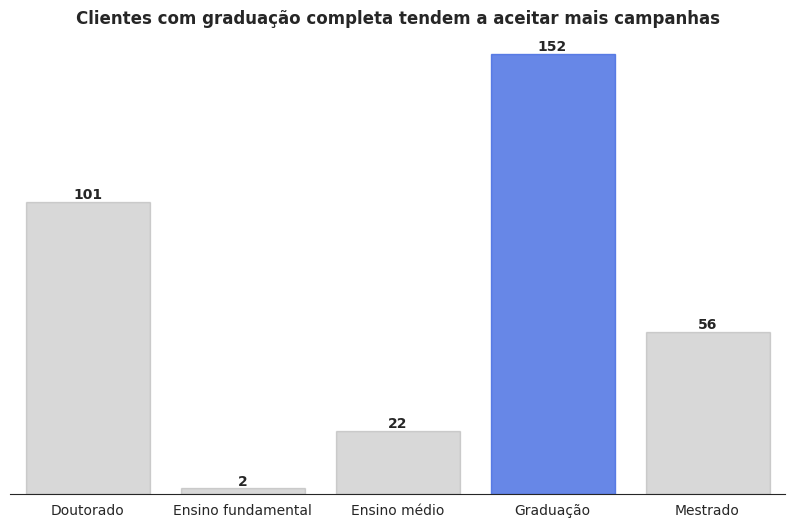

In [32]:
grafico_niveleducacao = plot_graficobarra(perfil_nivel_educacao, "educational_level", "Response")
plt.title("Clientes com graduação completa tendem a aceitar mais campanhas", fontweight = "bold")

Qual o tempo de casa dos clientes que mais aceitaram a campanha?

In [33]:
perfil_tempocasa = df_resposta_positiva.groupby("Customer_Years")["Response"].count().reset_index()
perfil_tempocasa

,Customer_Years,Response
0,6.0,54
1,7.0,160
2,8.0,119


Text(0.5, 1.0, 'Clientes com 7 anos de casa tendem a aceitar mais campanhas')

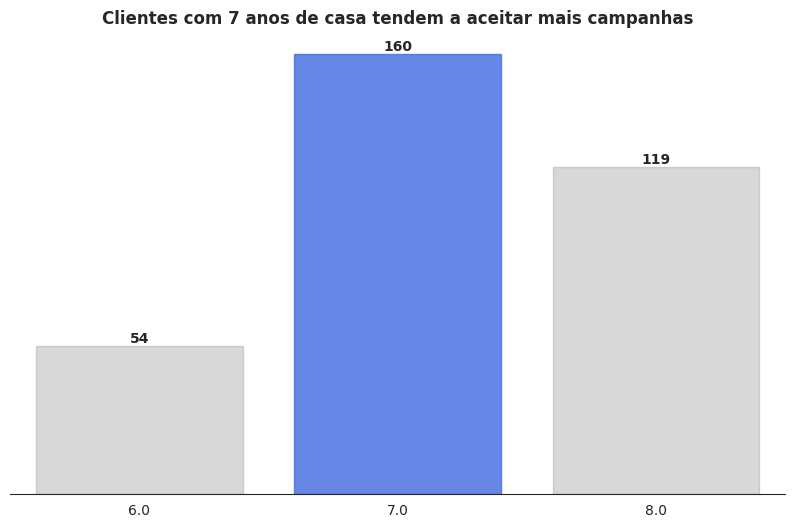

In [34]:
grafico_tempodecasa= plot_graficobarra(perfil_tempocasa, "Customer_Years", "Response")
plt.title("Clientes com 7 anos de casa tendem a aceitar mais campanhas", fontweight = "bold")

Qual o gasto médio em compras desses clientes e a média de gasto por visita no site?

In [42]:
media_gasto = round(df_resposta_positiva["MntTotal"].mean(),0)
print(f"A média de gasto é de R${media_gasto}")

A média de gasto é de R$924.0


In [43]:
media_visitas_mensais= round(df_resposta_positiva["NumWebVisitsMonth"].mean())
print(f"A média de visitas mensais é de {media_visitas_mensais}")

A média de visitas mensais é de 5


Qual o tempo médio desde a última compra?

In [44]:
media_regency= round(df_resposta_positiva["Recency"].mean())
print(f"A média de dias desde a última compra é de {media_regency} dias.")

A média de dias desde a última compra é de 35 dias.


Engajamento vs Gasto: Será que os clientes que mais engajaram com a campanha são de fato os que mais gastam?

In [41]:
limite_gasto_total = df_ifood_alter["MntTotal"].quantile(0.8)

df_ifood_alter["Perfil_Consumidor"] = df_ifood_alter['MntTotal'].apply(lambda x: "Alto gasto" if x>= limite_gasto_total else "Gasto mediano")
df_ifood_alter["Perfil_Engajamento"] = df_ifood_alter['Response'].apply(lambda x: "Não engajado" if x == 0 else "Engajado")
df_ifood_alter.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,MntRegularProds,AcceptedCmpOverall,User_ID,Age_Interval,marital_Status,educational_level,Income_Status,Customer_Years,Perfil_Consumidor,Perfil_Engajamento
0,58138.0,0,0,58,635,88,546,172,88,88,...,1441,0,1,60-70,Solteiro,Graduação,Classe D,8.0,Alto gasto,Engajado
1,46344.0,1,1,38,11,1,6,2,1,6,...,15,0,2,60-70,Solteiro,Graduação,Classe D,6.0,Gasto mediano,Não engajado
2,71613.0,0,0,26,426,49,127,111,21,42,...,692,0,3,50-60,União estável,Graduação,Classe C,7.0,Gasto mediano,Não engajado
3,26646.0,1,0,26,11,4,20,10,3,5,...,43,0,4,30-40,União estável,Graduação,Classe E,6.0,Gasto mediano,Não engajado
4,58293.0,1,0,94,173,43,118,46,27,15,...,392,0,5,30-40,Casado,Doutorado,Classe D,6.0,Gasto mediano,Não engajado


In [45]:
# Cruzamento dos dados dos perfis
matriz_engajamento = pd.crosstab(
    df_ifood_alter['Perfil_Consumidor'],
    df_ifood_alter['Perfil_Engajamento'],
    normalize='index'
) * 100

print(matriz_engajamento)

Perfil_Engajamento   Engajado  Não engajado
Perfil_Consumidor                          
Alto gasto          32.879819     67.120181
Gasto mediano       10.657596     89.342404


A análise cruzada dos dados de perfis de consumo e engajamento, indica que consumidores que tem gasto mediano a baixo tendem a rejeitar mais as campanhas de marketing. Além disso, apenas 32% dos clientes que mais gastam aceitaram a ação de marketing.

# Conclusões finais e recomendações:


## 1. Perfil de cliente ideal para campanhas:

O grupo de clientes com maior propensão a aceitar ações de campanha de marketing como a utilizada na última é composto por pessoas com as seguintes características:
- Demográficas: solteiros graduados na faixa de 40-50 anos com filhos em casa;
- Renda anual: pertencem a classe D com salário anual entre R$30000 e R$60000;
- Fidelidade: são usuários do serviço há 7 anos;

Com base nesses dados é possível aferir que a presença de dependentes em famílias de pais solteiros, pode tonar o uso de nossos serviçoes conveniente para esse perfil.

## 2. Comportamento e gasto em compras:

- Ticket médio e recência: os clientes com maior aceitação da campanha tendem a gastar em média R$962,00 e realizaram sua última compra em aproximadamente 35 dias;
- Satisfação: a análise de reclamações nos últimos 2 anos demonstra um baixo índice de insatisfação dos clientes que receberam as ações de marketing, logo, esse não é um fator que possa ter influenciado a baixa aceitação das campanhas.
- Total gasto: clientes que tendem a ter gastos medianos a baixo em compras não engajam com as ações.

## Recomendações:

- A análise de distribuição de clientes por tempo de casa indica que a ações de campanha foram direcionadas principalmente a clientes mais antigos. Assim, o envio de material de divulgação para clientes com menor tempo de fidelidade pode ser um possível teste para próximas campanhas.
- Identificar aspectos da última ação da campanha que podem ter contribuído para o seu melhor desempenho, e refiná-los para obter maior taxa de aceitação.
- Focar as ações de marketing que tenham linguagem voltada para o perfil mais engajado detalhado anteriormente, pais na faixa de 40-50 que fazem parte da classe média.
- Identificar e descontinuar estratégias como as utilizadas na campanha 2 para evitar perda de recursos com ações ineficazes.